In [1]:
# Imports
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle

In [2]:
# Load and convert data
# data = fetch_california_housing()
# df = pd.DataFrame(data.data, columns=data.feature_names)
# df['MedHouseVal'] = data.target

In [3]:
housing = pd.read_csv('data/housing.csv')

print(housing.head())
print(housing.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

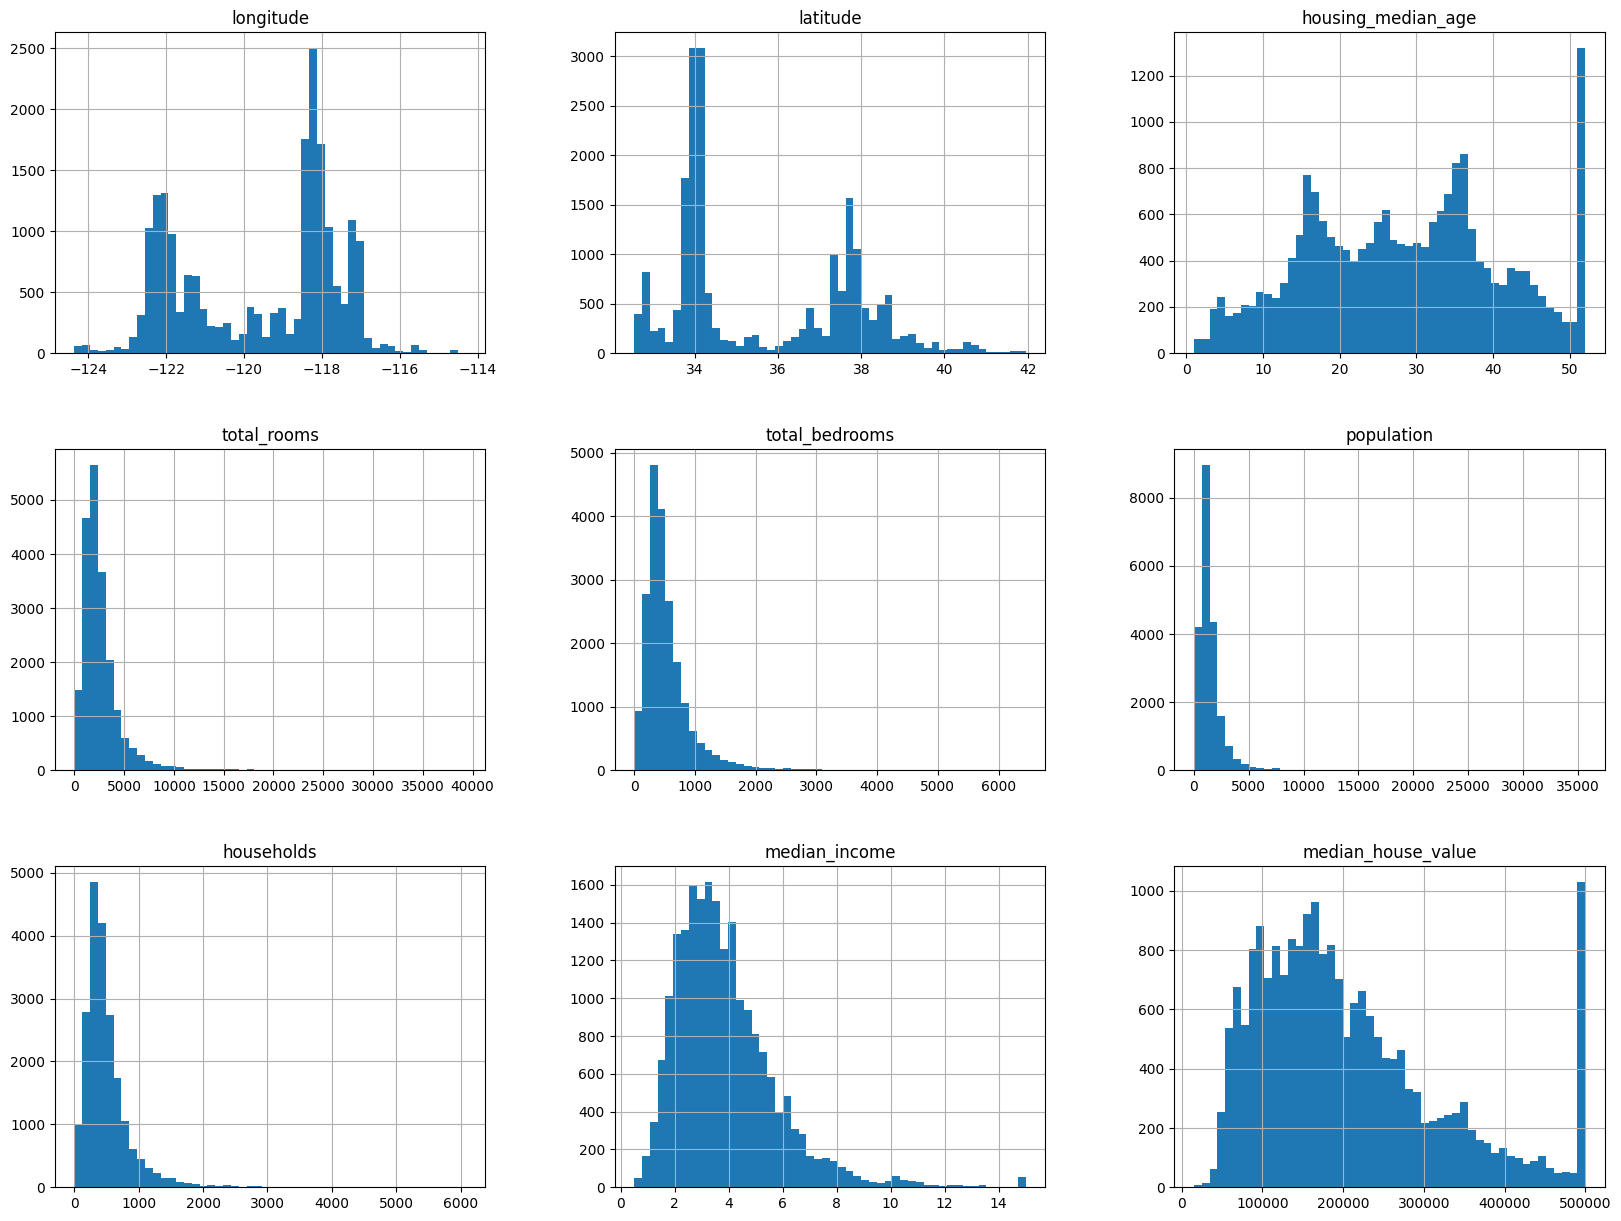

In [5]:
housing.hist(bins=50, figsize=(20,15))
plt.show()


In [6]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


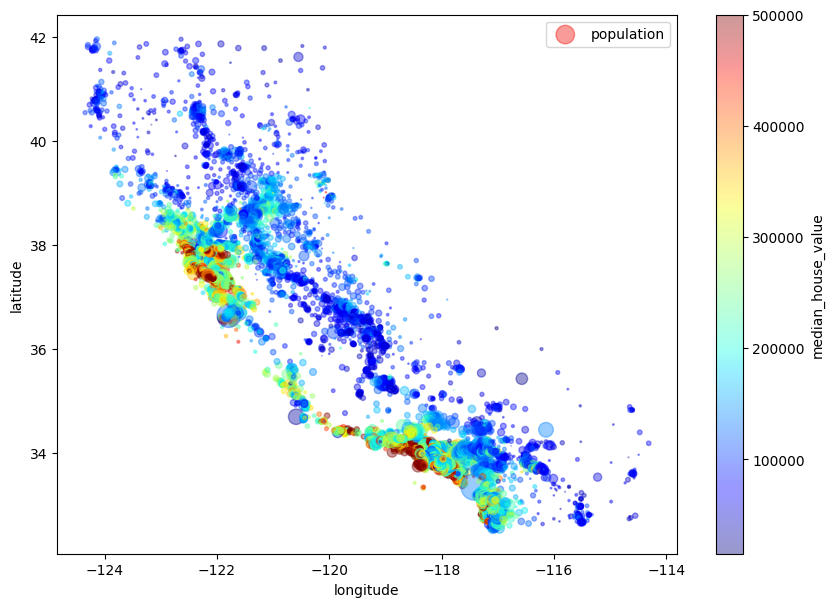

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()



In [19]:
housing = housing.drop("total_bedrooms", axis=1) # option 2



In [27]:
# Delete median_house_value over 500000

housing = housing[housing['median_house_value'] <= 500000]


In [20]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
print(housing_cat.head())

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded)


  ocean_proximity
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
[[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]


In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
import pandas as pd

# Get category names
cat_columns = cat_encoder.get_feature_names_out(["ocean_proximity"])

# Create DataFrame
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot.toarray(), columns=cat_columns, index=housing_cat.index)

# Combine with housing dataset (after dropping original 'ocean_proximity')
housing_combined = pd.concat([housing.drop("ocean_proximity", axis=1), housing_cat_1hot_df], axis=1)


In [23]:
print(housing_combined.shape)

(20640, 13)


In [ ]:
# Data info
print(housing_cat_encoded_df.info())
housing_cat_encoded_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ocean_proximity_encoded  20640 non-null  object
dtypes: object(1)
memory usage: 161.4+ KB
None


c:\Users\felix\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\algorithms.py:927: SparseEfficiencyWarning: Comparing sparse matrices using == is inefficient, try using != instead.
  keys, counts, _ = value_counts_arraylike(values, dropna)


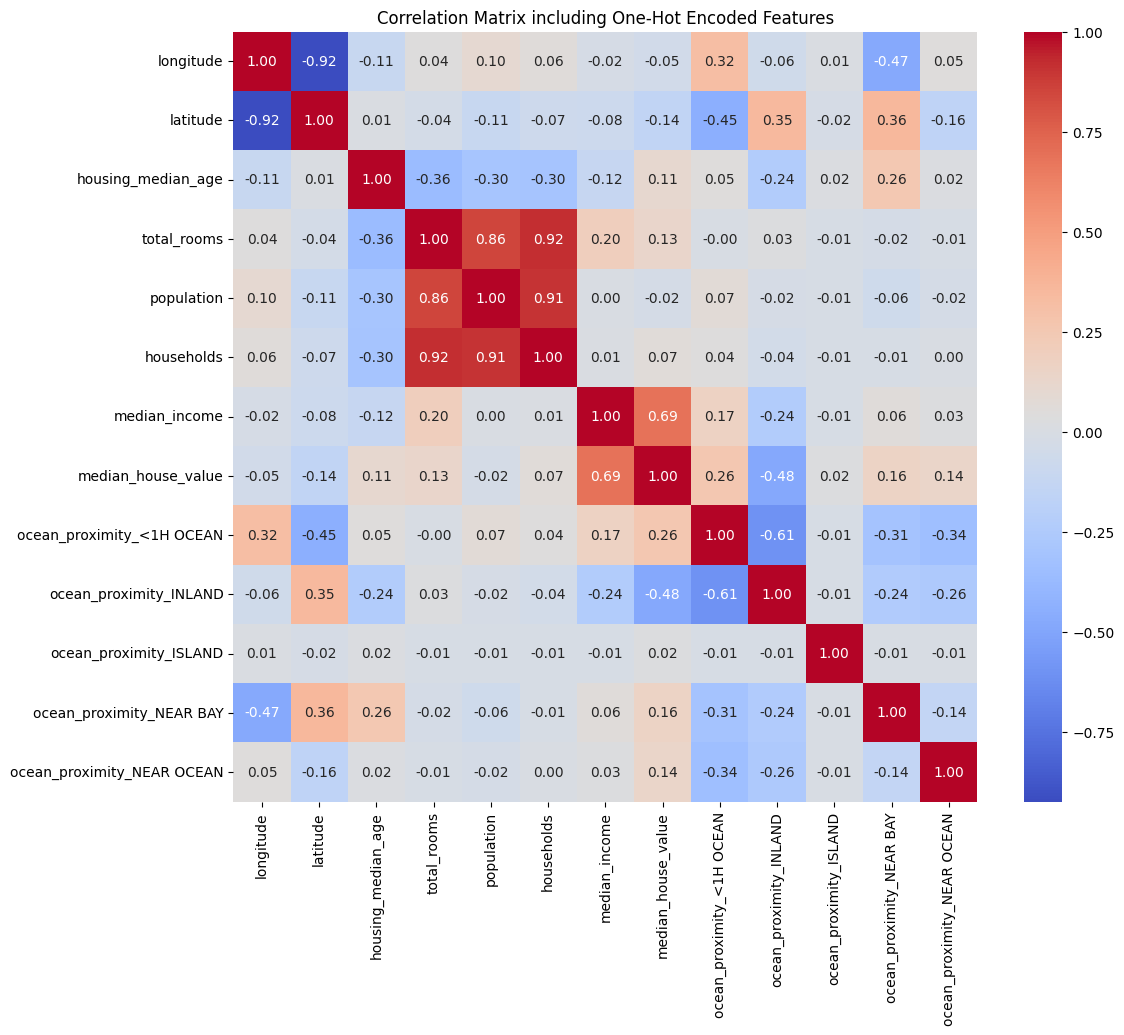

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have:
# housing_cat_1hot_df = one-hot encoded DataFrame for 'ocean_proximity'

# Combine housing with one-hot columns, dropping original categorical column
housing_combined = pd.concat(
    [housing.drop("ocean_proximity", axis=1), housing_cat_1hot_df],
    axis=1
)

# Select only numeric columns (including your one-hot encoded columns)
numeric_df = housing_combined.select_dtypes(include=["number"])

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix including One-Hot Encoded Features")
plt.show()


<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

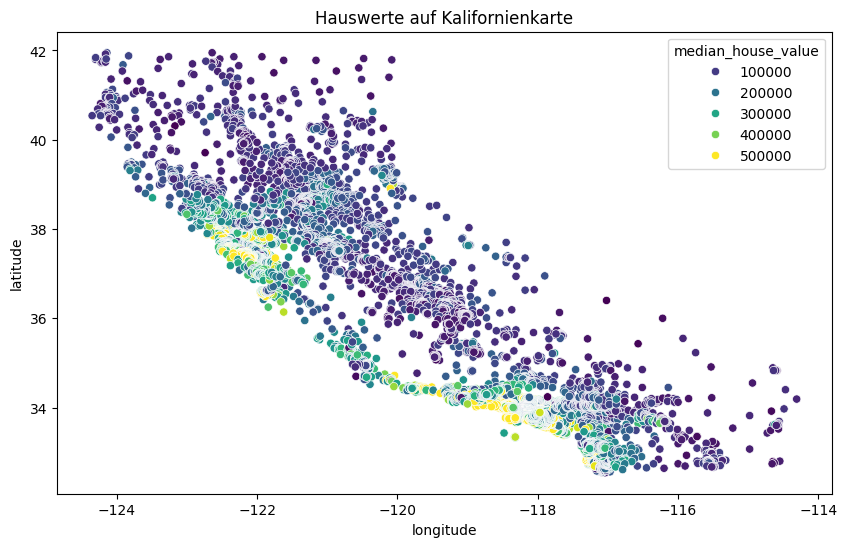

In [25]:
# Geografisch
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_combined['longitude'], y=housing_combined['latitude'], hue=housing_combined['median_house_value'], palette="viridis")
plt.title("Hauswerte auf Kalifornienkarte")
plt.colorbar

In [28]:
housing_combined.to_csv('data/housing_processed.csv', index=False)
